_______________________________________________________________________________
***Progetto Data Mining***

# Informazioni sul set di dati <br>
## Contesto <br>
Benvenuti nel mondo dello shopping di Istanbul! <br>
Il nostro set di dati contiene informazioni sugli acquisti da 10 diversi centri commerciali tra il 2021 e il 2023. <br>
Abbiamo raccolto dati da vari gruppi di età e sessi per fornire una visione completa delle abitudini di acquisto a Istanbul. <br>
Il set di dati include informazioni essenziali come numeri di fattura, ID cliente, età, sesso, metodi di pagamento, categorie di prodotti, quantità, prezzo, date degli ordini e posizioni dei centri commerciali. <br>
Ci auguriamo che questo set di dati funga da risorsa preziosa per ricercatori, analisti di dati e appassionati di machine learning che desiderano ottenere informazioni sulle tendenze e sui modelli di acquisto a Istanbul. <br>
Esplora il set di dati e scopri l'affascinante mondo dello shopping di Istanbul! <br>
## Contenuto <br>
###*Informazioni sugli attributi*: <br>
***invoice_no***: numero della fattura. Nominale. Una combinazione della lettera "I" e di un numero intero di 6 cifre assegnato in modo univoco a ciascuna operazione. <br>
***customer_id***: numero cliente. Nominale. Una combinazione della lettera "C" e di un numero intero di 6 cifre assegnato in modo univoco a ciascuna operazione. <br>
***gender***: variabile stringa del sesso del cliente. <br>
***age***: Variabile intera positiva dell'età del cliente. <br>
***category***: Variabile stringa della categoria del prodotto acquistato. <br>
***quantity***: le quantità di ciascun prodotto (articolo) per transazione. Numerico. <br>
***price***: Prezzo unitario. Numerico. Prezzo del prodotto per unità in lire turche (TL). <br>
***payment_method***: Variabile stringa del metodo di pagamento (contanti, carta di credito o bancomat) utilizzato per la transazione. <br>
***invoice_date***: data della fattura. Il giorno in cui è stata generata una transazione. <br>
***shopping_mall***: Variabile stringa del nome del centro commerciale dove è stata effettuata la transazione. <br>

In [209]:
from pandas import DataFrame, Series
from io import StringIO 
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
import seaborn as sb 
import statistics as stat
import time
import math

In [210]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import * 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder


In [211]:
def describe(a):
    if type(a) is np.ndarray:
        print("data:\n{}\nshape:{}\ndtype:{}\ntype: {}".format(a, a.shape, a.dtype, type(a)))
    elif type(a) is pd.Series:
        print("data:\n{}\nshape:{}\ndtype:{}\nname:{}\nindex-name:{}\ntype:{}".format(a, a.shape, a.dtype, a.name, a.index.name, type(a)))
    elif type(a) is pd.DataFrame:
        print("data:\n{}\nshape:{}\ntype:{}".format(a, a.shape,type(a)))
    else:
        print("{}, type:{}".format(a, type(a)))

In [212]:
#from google.colab import drive
#drive.mount('/content/drive')

In [213]:
#dataFrameShopping = pd.read_csv("/content/drive/MyDrive/customer_shopping_data.csv")
dataFrameShopping = pd.read_csv("content/drive/MyDrive/customer_shopping_data.csv")

In [214]:
dataFrameShopping.shape

(99457, 10)

In [215]:
dataFrameShopping.sample(frac=1).head(20)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
57134,I152285,C288569,Male,41,Food & Beverage,4,20.92,Cash,11/9/2021,Zorlu Center
58699,I925784,C178500,Male,20,Toys,3,107.52,Cash,23/12/2022,Emaar Square Mall
13830,I283736,C105666,Male,49,Cosmetics,1,40.66,Cash,14/01/2021,Forum Istanbul
4317,I236755,C181552,Male,63,Shoes,4,2400.68,Debit Card,6/4/2022,Metropol AVM
14336,I131284,C112287,Female,31,Clothing,1,300.08,Debit Card,25/09/2021,Metropol AVM
30557,I515797,C460785,Female,48,Clothing,3,900.24,Credit Card,26/05/2022,Kanyon
58997,I137465,C215888,Male,22,Shoes,4,2400.68,Cash,21/07/2021,Mall of Istanbul
26959,I674749,C253512,Female,69,Food & Beverage,4,20.92,Cash,9/8/2022,Metropol AVM
26774,I167047,C100986,Female,47,Clothing,4,1200.32,Cash,4/6/2021,Mall of Istanbul
89754,I264633,C223715,Male,24,Toys,4,143.36,Cash,26/04/2022,Viaport Outlet


In [216]:
dataFrameShopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [217]:
dataFrameShopping.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [218]:
dataFrameShopping.duplicated().value_counts()

False    99457
dtype: int64

Dal dataset non risulta alcuna colonna contenene valori NULL, 
per cui si procede con il pre-processing del dataset.

***PRE-PROCESSING***

Il primo passo del pre-processing consiste nel creare una copia del dataset,
su cui andiamo a fare le modifiche.
Queste mmodifiche rappresentano nell'eliminare le prime due colonne,
ovvero l'ID della fattura e l'ID del cliente.

In [219]:
dfCopy = dataFrameShopping.copy()

In [220]:
dfCopy.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [221]:
dfCopy = dfCopy.drop(columns=['invoice_no','customer_id'])

A questo punto andiamo a mappare le stringhe con valori interi.

Per la colonna relativa al genere la andiamo a mappare con il valore binario 0/1, in cui il valore 0 rapprensenta 'Female' e il valore 1 'Male'.

In [222]:
dfCopyGender = dfCopy.copy()
dfCopyGender.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [223]:
dfCopyGender['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

In [224]:
dfCopyGender

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,0,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,1,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,1,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,0,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,0,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,0,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,1,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,1,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,1,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [225]:
dfCopyGenderPayment = dfCopyGender.copy()

In [226]:
dfCopyGenderPayment['payment_method'].replace(['Credit Card', 'Debit Card', 'Cash'], [0, 0, 1], inplace=True)

In [227]:
dfCopyGenderPayment

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,0,28,Clothing,5,1500.40,0,5/8/2022,Kanyon
1,1,21,Shoes,3,1800.51,0,12/12/2021,Forum Istanbul
2,1,20,Clothing,1,300.08,1,9/11/2021,Metrocity
3,0,66,Shoes,5,3000.85,0,16/05/2021,Metropol AVM
4,0,53,Books,4,60.60,1,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,0,45,Souvenir,5,58.65,0,21/09/2022,Kanyon
99453,1,27,Food & Beverage,2,10.46,1,22/09/2021,Forum Istanbul
99454,1,63,Food & Beverage,2,10.46,0,28/03/2021,Metrocity
99455,1,56,Technology,4,4200.00,1,16/03/2021,Istinye Park


***Trasformazione della data***

Trasformo le date dal formato gg/mm/aaaa in due nuove colonne che rappresenteranno il mese e l'anno.

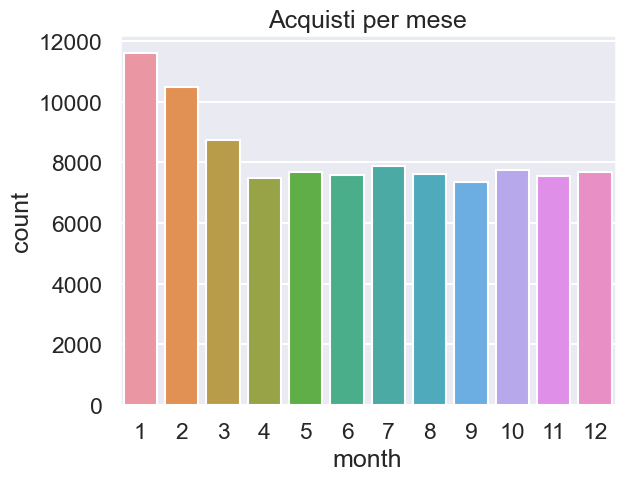

In [228]:
df = dfCopyGenderPayment.copy()
# Aggiungo la colonna "month" al dataframe
df['month'] = df.invoice_date.str.split("/", expand = True)[1]
# Aggiungo la colonna "year" al dataframe
df['year'] = df.invoice_date.str.split("/", expand = True)[2]
df['month'].replace(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
df['month'].replace(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
dfCopy = df.copy()
dfCopy = dfCopy.drop(columns=['invoice_date'])
dfCopy.head(20)
fh = sb.countplot(x = dfCopy['month']).set_title('Acquisti per mese')


In [229]:
dfCopy.head()

,gender,age,category,quantity,price,payment_method,shopping_mall,month,year
0,0,28,Clothing,5,1500.40,0,Kanyon,8,2022
1,1,21,Shoes,3,1800.51,0,Forum Istanbul,12,2021
2,1,20,Clothing,1,300.08,1,Metrocity,11,2021
3,0,66,Shoes,5,3000.85,0,Metropol AVM,5,2021
4,0,53,Books,4,60.60,1,Kanyon,10,2021


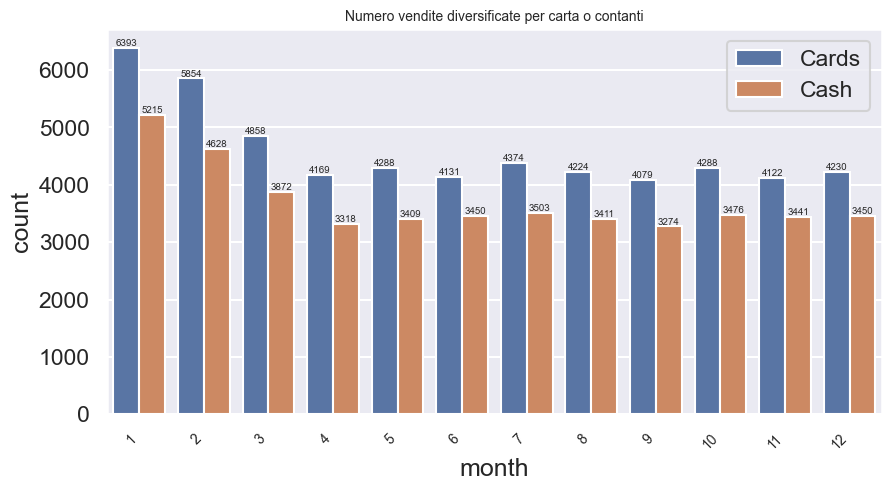

In [230]:
plt.figure(figsize = (10,5))
ax = sb.countplot(x = 'month', hue = 'payment_method', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment ='right', fontsize=10)
plt.title("Numero vendite diversificate per carta o contanti", fontsize = 10)
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Cards','Cash'], bbox_to_anchor=(1,1))
for bars in ax.containers:
  ax.bar_label(bars, fontsize=7)
  
plt.show()

In [231]:
dfSplitAge = df.copy()
dfSplitAge['age'].replace(
    [18, 19, 20, 21, 
     22, 23, 24, 25, 
     26, 27, 28, 29, 
     30, 31, 32, 33, 
     34, 35, 36, 37, 
     38, 39, 40, 41, 
     42, 43, 44, 45, 
     46, 47, 48, 49, 
     50, 51, 52, 53, 
     54, 55, 56, 57, 
     58, 59, 60, 61, 
     62, 63, 64, 65, 
     66, 67, 68, 69], 
    [18.21, 18.21, 18.21, 18.21,    
     22.25, 22.25, 22.25, 22.25, 
     26.29, 26.29, 26.29, 26.29,
     30.33, 30.33, 30.33, 30.33,
     34.37, 34.37, 34.37, 34.37,
     38.41, 38.41, 38.41, 38.41,
     42.45, 42.45, 42.45, 42.45, 
     46.49, 46.49, 46.49, 46.49,  
     50.53, 50.53, 50.53, 50.53,
     54.57, 54.57, 54.57, 54.57,
     58.61, 58.61, 58.61, 58.61, 
     62.65, 62.65, 62.65, 62.65,
     66.69, 66.69, 66.69, 66.69], inplace=True)

#labels = ['18-21', '22-25', '26-29', '30-33', '34-37', '39-41', '42-45', '46-49', '50-53', '54-57', '58-61', '62-65', '66-69']
#ccd = sb.countplot(y = dfSplitAge['age']).set_yticklabels(labels)
dfSplitAge.head()


,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year
0,0,26.29,Clothing,5,1500.40,0,5/8/2022,Kanyon,8,2022
1,1,18.21,Shoes,3,1800.51,0,12/12/2021,Forum Istanbul,12,2021
2,1,18.21,Clothing,1,300.08,1,9/11/2021,Metrocity,11,2021
3,0,66.69,Shoes,5,3000.85,0,16/05/2021,Metropol AVM,5,2021
4,0,50.53,Books,4,60.60,1,24/10/2021,Kanyon,10,2021


Trasformo le categorie da stringhe in dati numerici e mostro come variano in base all'età le abitudini di acquisto

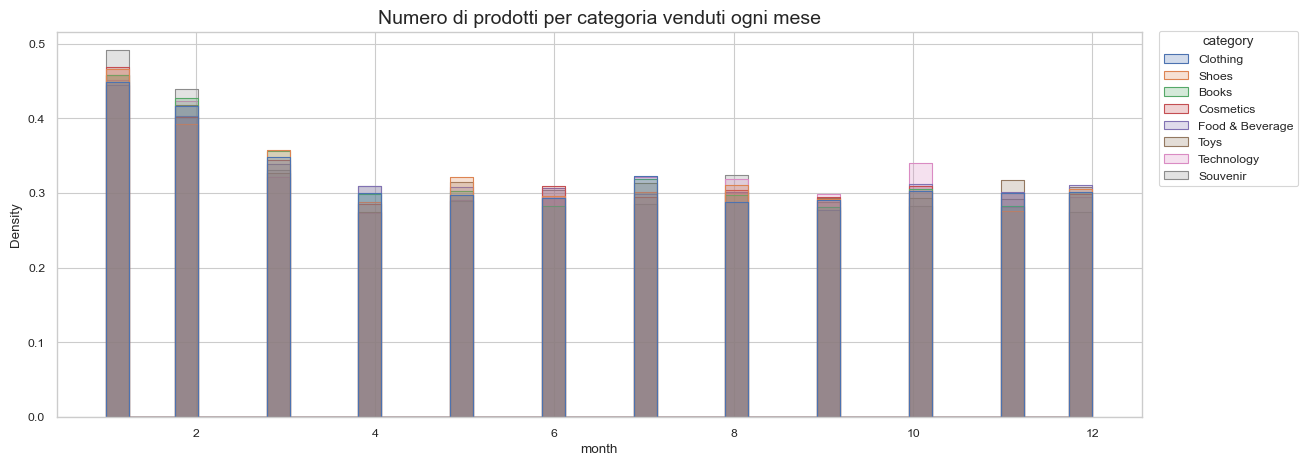

In [280]:
dfCategories = dfCopy.copy()
#dfCategories['category'].replace(['Clothing', 'Cosmetics', 'Food & Beverage', 'Toys', 'Shoes', 'Souvenir', 'Technology', 'Books'], [1,2,3,4,5,6,7,8], inplace=True)
#dfCategoriesMall = dfCategories.copy()
#dfCategoriesMall['shopping_mall'].replace(['Mall of Istanbul', 'Kanyon', 'Metrocity', 'Metropol AVM', 'Istinye Park', 'Zorlu Center', 'Cevahir AVM', 'Forum Istanbul', 'Viaport Outlet', 'Emaar Square Mall'], [0,1,2,3,4,5,6,7,8,9], inplace=True)
#dfCatGen = dfCategoriesMall.copy()
#dfCatGen.drop(columns=['invoice_date'])
#fig = px.histogram(dfCategories, x='category', y='price', color='gender', labels={'category': 'Category', 'gender': 'Gender'})
#fig.show()
plt.figure(figsize = (14,5))
cdfr = sb.histplot(dfCategories, x='month', hue='category', element='step', stat='density', common_norm=False)
cdfr.set_title('Numero di prodotti per categoria venduti ogni mese', fontsize=14)
sb.move_legend(obj=cdfr, loc = 'upper right', bbox_to_anchor=(1.15,1.019))

#dfCatGen.head()